# **Diabetes Prediction**

### **1. Mô tả đề tài**
Hệ thống phân loại bệnh tiểu đường sử dụng thuật toán Naive Bayes

### **2. Dataset**
Bộ dữ liệu được sử dụng bao gồm 22 thuộc tính:
 *   **Diabetes_binary**: Không mắc bệnh - Tiền tiểu đường - Mắc bệnh tiểu đường (0,1,2)
 *   **HighBP**: Huyết áp cao (0,1)
 *   **HighChol**: Cholesterol cao (0,1)
 *   **CholCheck**: Kiểm tra Cholesterol trong 5 năm trở lại đây (0,1)
 *   **BMI**: Chỉ số cơ thể BMI
 *   **Smoker**: Đã hút thuốc lá từ 100 điếu (0,1)
 *   **Stroke**: Bị đột quỵ (0,1)
 *   **HeartDiseaseorAttack**: Bệnh tim mạch (0,1)
 *   **PhysActivity**: Vận động cơ thể (0,1)
 *   **Fruits**: Ăn trái cây mỗi ngày (0,1)
 *  **Veggies**: Ăn rau mỗi ngày (0,1)
 *  **HvyAlcoholConsump**: Uống rượu (Đàn ông >=14 ly/tuần, Phụ nữ >=7 ly/tuần) (0,1)
 *  **AnyHealthcare**: Có sử dụng baỏ hiểm chăm sóc sức khỏe (0,1)
 *  **NoDocbcCost**: Đã không khám bệnh vì lý do chi phí (0,1)
 *  **GenHlth**: Tự đánh giá thang điểm sức khỏe (Tốt->Xấu) (1-5)
 *  **MentHlth**: Sô ngày có sức khỏe không tốt trong 30 ngày qua (0-30)
 *  **PhysHlth**: Số ngày đâu ốm hoặc chấn thương trong 30 ngày qua (0-30)
 *  **DiffWalk**: Có gặp khó khăn khi đi bộ hoặc leo cầu thang (0,1)
 *  **Sex**: Giới tính (nam, nữ) (1,0)
 *  **Age**: Độ tuổi (1 = 18-24 tuổi;...; 9 = 60-64 tuổi; 13 = từ 80 tuổi) (1-13)
 *  **Education**: Trình độ học vấn (1-6)
 *  **Income**: Thang thu nhập (1-8)


# 1. Import libraries

In [517]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## sklearn libary
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report

import pickle


# 2. Data preprocessing

In [518]:
#data = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")
data = pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data.rename(columns={'Diabetes_binary': 'Diabetes_012'}, inplace=True)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [519]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [520]:
#Check null values
data.dropna(inplace=True)
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [521]:
# Drop duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [522]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [523]:
data['Diabetes_012'].value_counts()

1.0    35097
0.0    33960
Name: Diabetes_012, dtype: int64

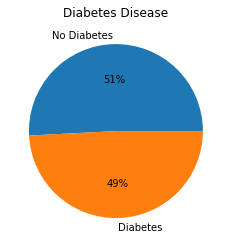

In [524]:
# Create a plot to display the percentage of diabetes-binary
labels = ['No Diabetes', 'Diabetes']
values = data['Diabetes_012'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Diabetes Disease')
plt.show()

# 3. Attributes Correlation

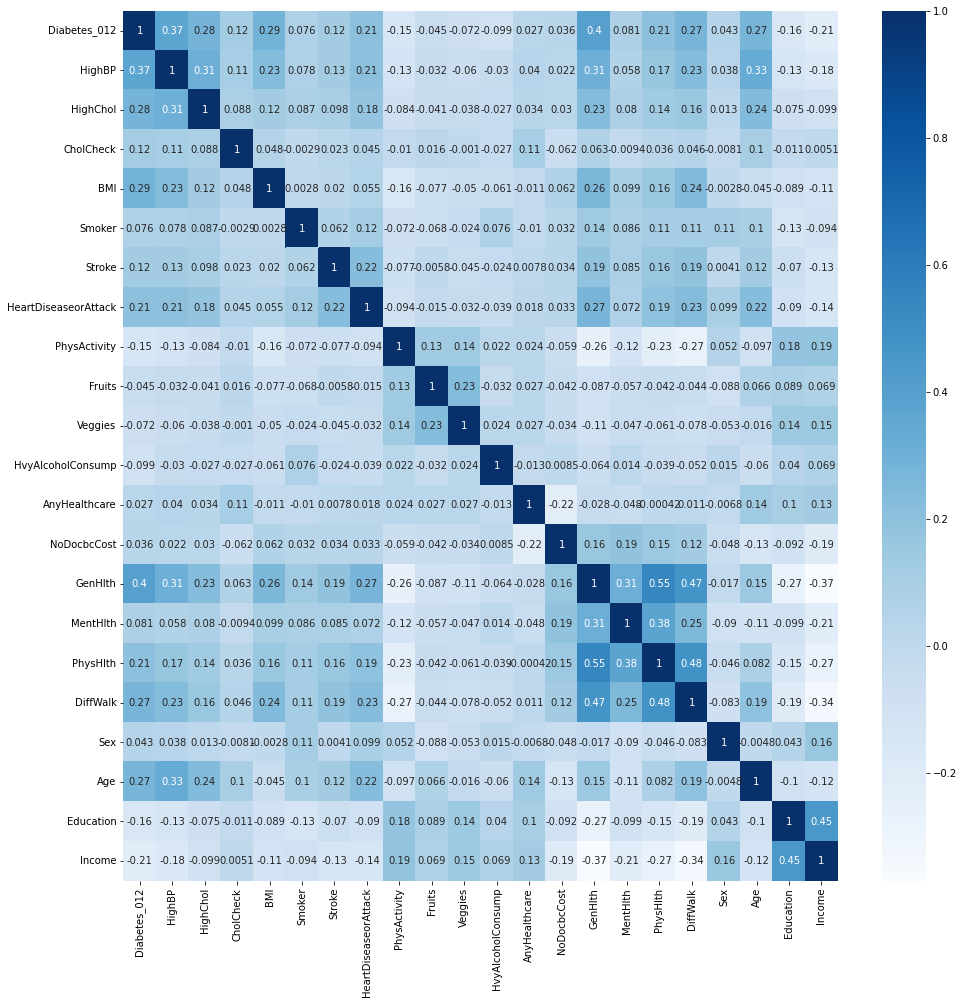

In [525]:
# Correlation map
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot = True, cmap = "Blues")
plt.show()

# 4. Remove outliers

In [526]:
# from sklearn.ensemble import IsolationForest
# model = IsolationForest()
# model.fit(data)
# data['anomaly']= model.predict(data)

In [527]:
# data[data['anomaly']==-1]

In [528]:
# data.drop(data[data['anomaly']==-1].index,inplace = True)
# data.drop(columns=['anomaly'], inplace=True)
# data.shape

In [529]:
# data['Diabetes_012'].value_counts()

# 5. Modeling

In [530]:
X=data.drop(['Diabetes_012'],axis=1)
y= data['Diabetes_012']
# scaler = MinMaxScaler()
# X_scaler = scaler.fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(X.values,y,test_size=0.3,random_state=42,shuffle=True)

In [531]:
# Oversampling
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

In [532]:
# from collections import Counter
# print('Resampled dataset shape %s' % Counter(y_res))

In [533]:
gs = GaussianNB()
gs.fit(X_train, y_train)
print("Naive Bayes Gaussian score: ",gs.score(X_test, y_test))
y_predict = gs.predict(X_test)
print(classification_report(y_test, y_predict))

Naive Bayes Gaussian score:  0.7179747079833961
              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71     10120
         1.0       0.73      0.71      0.72     10598

    accuracy                           0.72     20718
   macro avg       0.72      0.72      0.72     20718
weighted avg       0.72      0.72      0.72     20718



In [534]:
mn = MultinomialNB()
mn.fit(X_train, y_train)
print("Naive Bayes Multinomial score: ",mn.score(X_test, y_test))
y_predict = mn.predict(X_test)
print(classification_report(y_test, y_predict))

Naive Bayes Multinomial score:  0.596920552176851
              precision    recall  f1-score   support

         0.0       0.56      0.81      0.66     10120
         1.0       0.68      0.40      0.50     10598

    accuracy                           0.60     20718
   macro avg       0.62      0.60      0.58     20718
weighted avg       0.62      0.60      0.58     20718



In [535]:
bn = BernoulliNB(binarize=0.1)
bn.fit(X_train, y_train)
print("Naive Bayes Bernoulli score: ",bn.score(X_test, y_test))
y_pred=bn.predict(X_test)
print(classification_report(y_test, y_pred))

Naive Bayes Bernoulli score:  0.701660391929723
              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70     10120
         1.0       0.72      0.69      0.70     10598

    accuracy                           0.70     20718
   macro avg       0.70      0.70      0.70     20718
weighted avg       0.70      0.70      0.70     20718



# 6. Save model

In [536]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(gs, file)